In [5]:
# create table pemb(
#     paragraph text,
#     paraemb vector(384)
# );

In [73]:
import psycopg2
import pandas as pd

connection = psycopg2.connect(
database="mlchatbot",
user="postgres",
password="#RNJ7773RNJ7773",
host="localhost",
port="5433"
)


In [74]:
cursor=connection.cursor()

In [75]:
cursor.execute("SELECT  * FROM pemb")

In [79]:
df=pd.read_csv("extracted_text2.csv")

In [80]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')



In [81]:
insert_query = """
    INSERT INTO pemb(paragraph, paraemb)
    VALUES (%s, %s)
    """

In [82]:
df.columns

Index(['Paragraph'], dtype='object')

In [83]:
# for i in range(len(df)):
#     try:
#         text = df.iloc[i]["Paragraph"]
#         textemb = model.encode(text).tolist()
#         cursor.execute(insert_query, (text, textemb))
#     except Exception as e:
#         print(f"Error inserting row {i}: {e}")
#         break

# connection.commit()


In [84]:
cursor.execute("select * from pemb;")

In [85]:
result=cursor.fetchall()

In [16]:
import ast
import numpy as np

listPara=[]
listEmb=[]

for i in result:
    para=i[0]
    emb=ast.literal_eval(i[1])
    listPara.append(para)
    listEmb.append(emb)

In [17]:
data =np.array(listEmb)

In [31]:
from sklearn.cluster import KMeans
Kmean=KMeans(n_clusters=23,random_state=18)
Kmean.fit(listEmb)
labels=Kmean.labels_

c:\New folder (2)\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
print(labels)

[ 3  3  3  3  3  3  3  3  3  3  9  9  3  3  7  9  3  9  5  3  5  3  3  3
 10 10  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5 10 10
  5  5  5  5  5  1  5 14 18  2 14 14 14  2  2 16 18 14 14 14  5 14  2 14
 18 18 18 18 18  2  2 14  2 14 14 14  6 21 21 21 21  2 21  2 21  7  7 21
  7  7  7  7  7 21  7  7  7  7  7  7  7 21 21  6 21  7 21  7 21  1 21 21
  7  7  2  7 21 21 21 21 21  7 21  3  1 18  8 19 11 11 19 19 19 19 19 11
 11 11 20 11 20 19 20 20 20 20  1 19 20  6 22 22 22  8  8  8  8  8  8  8
  8 15  8  8  8  2  8  8  7  8  8 18 22 22 22 22 22 22 22  1 22 22 15 15
 15 15 15 15 20  8 20  8 20  1 22 22  8 22  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 13  1  1  0  0  0  0  0
  0  0  7  7  0  0 10 12  0  0  0  0  0  0 13 13 13 13 12 13 13 13 13 13
  4 13 13 13 13 13 13 13 13 13 13 13 13 13 10 12 12  4  4  4  4  4  4  4
 12 12 12  4  4 12 12 12  4 10 10 12 12 12 12  4 12  4 10 12 12 12 10 10
 10 10 10 10 12 10 10 10 17 12 12 12 10 10 10 10 10

In [69]:
dflabel=pd.DataFrame({"Text":listPara,"Category":labels})

In [70]:
dflabel[dflabel["Category"]==6]

,Text,Category
84,"80 MACHINE LEARNING Quinlan, J. R., & Rivest, ...",6
111,keep in mind that the network weight vectors r...,6
157,"Geman, S., Bienenstock, E., & Doursat, R. (199...",6
397,400 SUBJECT INDEX SUBJECT INDEX Page numbers i...,6
399,"CART system, 77 CASCADE-CORRELATION algorithm,...",6
400,"leave-one-out, 235 in neural network learning,...",6
401,"Entailment, 321n relationship with 8-subsumpti...",6
402,"extensions to, 258-259 ID5R algorithm, compari...",6
403,"Hypotheses, estimation of accuracy (continued)...",6
404,"of LMS algorithm, 64 of ROTE-LEARNER algorithm...",6


In [97]:
import matplotlib.pyplot as plt

In [98]:
list1=list(range(len(labels)))

In [1]:
# for i in result:
#     print(i[0])
#     print(i[1])
#     print("--------------------------------------------------")

In [100]:
dflabel.columns

Index(['Text', 'Category'], dtype='object')

In [101]:
dflabelSort=dflabel.sort_values(by="Category")

In [102]:
listCount=[]

In [103]:
l=list(labels)
l.count(0)

16

In [104]:
for i in range(23):
    val=l.count(i)
    listCount.append(val)

In [105]:
lx=list(range(23))

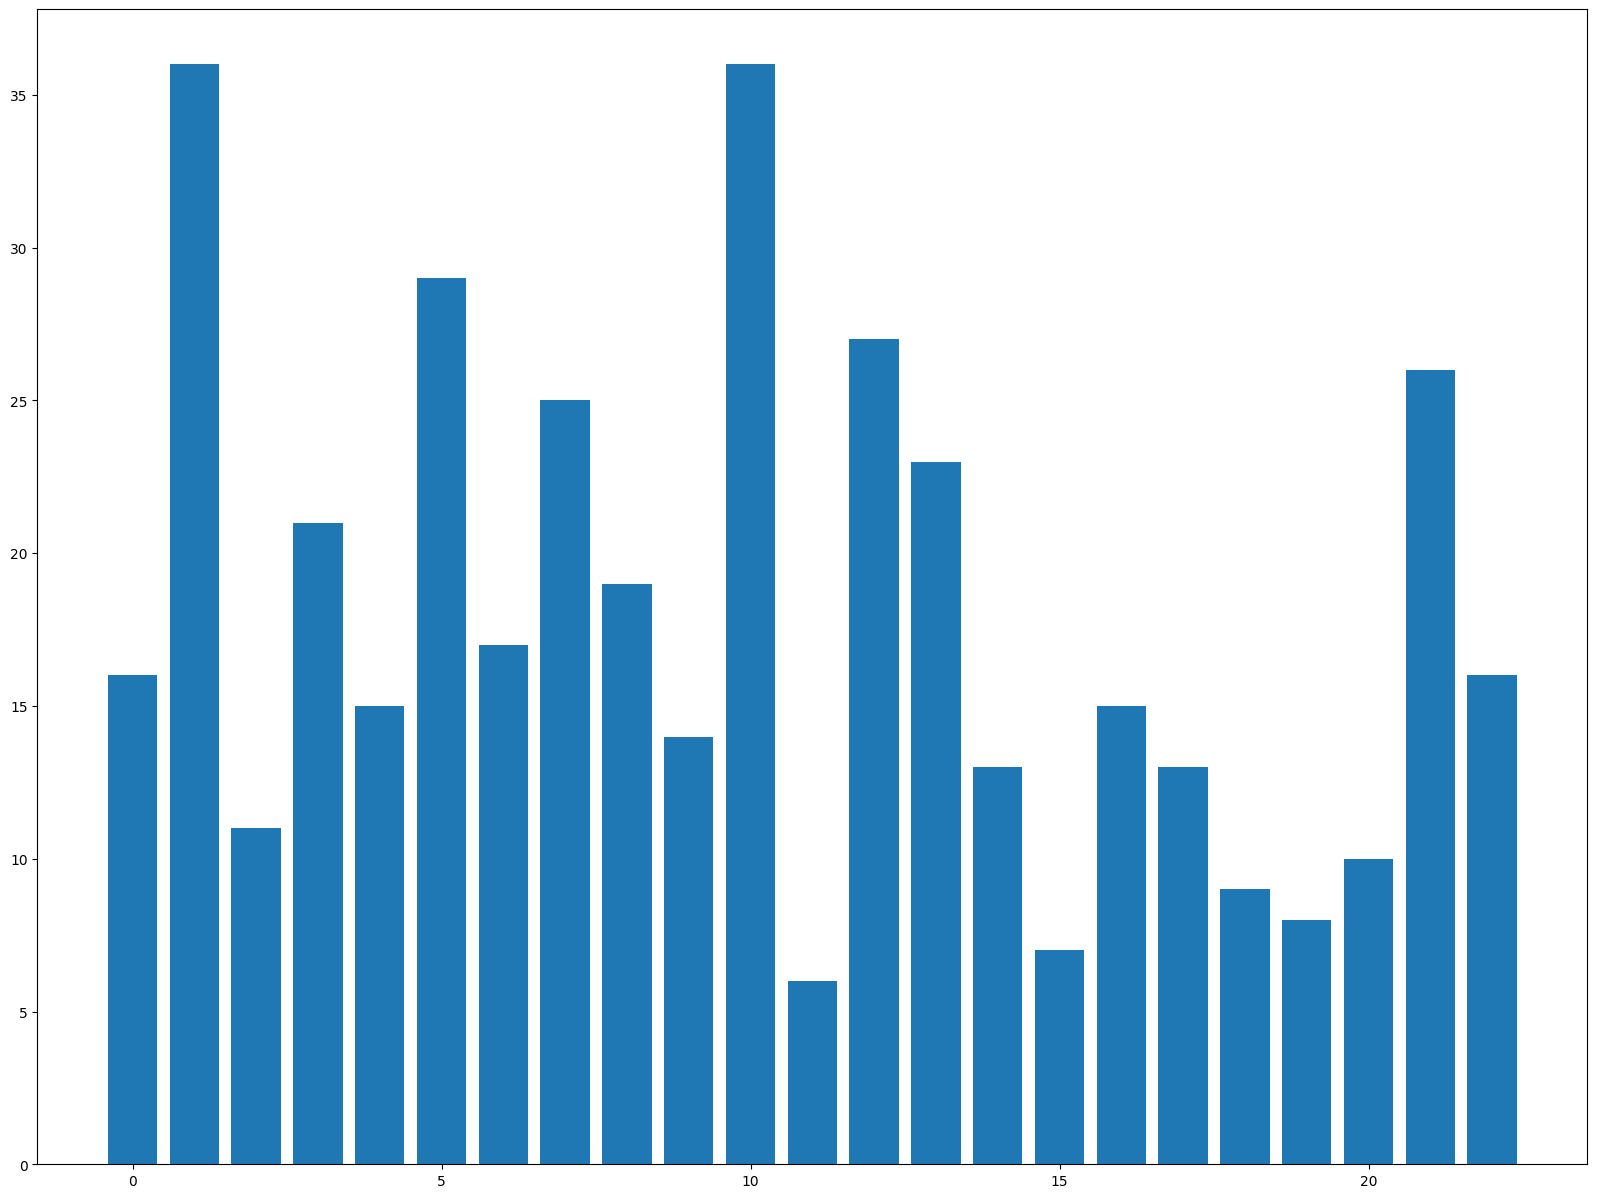

In [106]:
plt.figure(figsize=[20,15])
plt.bar(lx,listCount)
plt.show()

In [107]:
sum(listCount)

412